In [1]:
from matplotlib import pyplot as plt
import csv
import pandas as pd
import numpy as np
import os
from prettytable import PrettyTable

def read_csv(csv_path, attributes_to_obtain=None):
    with open(csv_path) as csv_file:
        reader = csv.reader(csv_file)
        csv_info = list(reader)
    
    df = pd.DataFrame.from_records(csv_info[1:], columns=csv_info[0])
    if attributes_to_obtain is not None:
        df = df[attributes_to_obtain]
    df = df.apply(pd.to_numeric)
    
    return df

def getMeanMetrics(df):
    mean_accuracy,std_accuracy = np.mean(df['accuracy'].values), np.std(df['accuracy'].values)
    mean_recall,std_recall = np.mean(df['mean_recall'].values), np.std(df['mean_recall'].values)
    mean_prec, std_prec = np.mean(df['mean_precision'].values), np.std(df['mean_precision'].values)
    mean_F1, std_F1 = np.mean(df['mean_F1'].values), np.std(df['mean_F1'].values)

    mean_metrics = [mean_accuracy, mean_recall, mean_prec, mean_F1]
    std_metrics = [std_accuracy, std_recall, std_prec, std_F1]
        
    return mean_metrics, std_metrics

def plot_mean_std(x_axis_list, y_axis_list, std, title, y_lim_inf, x_label, y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim(y_lim_inf, 1)
    x = np.array([1,2,3,4])
    plt.errorbar(x[0], y_axis_list[0], std[0], linestyle='None', marker='o')
    plt.errorbar(x[1], y_axis_list[1], std[1], linestyle='None', marker='^')
    plt.errorbar(x[2], y_axis_list[2], std[2], linestyle='None', marker='*')
    plt.errorbar(x[3], y_axis_list[3], std[3], linestyle='None', marker='s')
    plt.xticks(x, x_axis_list)
    plt.show()
    #plt.savefig(title + '.png')
    plt.close()

def plot_graphs(csv_file):
    #Getting dataset information from csv file
    #df = read_csv(csv_file, ['cross_val', 'kfold','accuracy','mean_recall','mean_precision','mean_F1'])
    df = read_csv(csv_file)
    
    dataset_name = os.path.basename(csv_file).split('_')[0] + '_' +os.path.basename(csv_file).split('_')[1]
    reg_factor = os.path.basename(csv_file).split('_')[2]
    layers = os.path.basename(csv_file).split('_')[3].split('-')[0]
    
    x = [str(x) for x in range(1,11)]
    
    ##################### Comparing all metrics vs number of decision Trees #####################
    plt.title('All metrics vs Kfold - ' + dataset_name + '. Fator Reg. = ' + str(reg_factor) + ',camadas=' + str(layers))
    plt.xlabel('Kfold')
    plt.ylabel('Metric value')
    plt.plot(x, df['accuracy'].values, '-o')
    plt.plot(x, df['mean_recall'], '-^')
    plt.plot(x, df['mean_precision'], '-*')
    plt.plot(x, df['mean_F1'], '-s')
    plt.gca().legend(('accuracy','recall', 'precision', 'F1-Measure'))
    plt.show()
    #plt.savefig('All metrics vs n_tree - ' + dataset_names[index] + '.png')
    plt.close()

    
    ##################### Mean metrics(mean +- std) #####################
    #Getting global mean and std
    mean_metrics, std_metrics = getMeanMetrics(df)
    title = 'Mean metrics - ' + dataset_name + '. Fator Reg. = ' + str(reg_factor) + ',camadas=' + str(layers)
    if dataset_name == 'wine_dataset':
        y_lim_inf = 0.9
    elif dataset_name == 'ionosphere_dataset':
        y_lim_inf = 0.75
    elif dataset_name == 'pima_dataset':
        y_lim_inf = 0.6
    plot_mean_std(['Accuracy', 'Recall', 'Precision', 'F1-measure'], mean_metrics,std_metrics, title,y_lim_inf,'Métrica', 'Metric Value')
    
    ##################### Precision, Recall, F1 per class #####################
    if dataset_name == 'ionosphere_dataset':
        ##################### Recall per Class #####################
        plt.title('Recall Per Class - ' + dataset_name + '. Fator Reg. = ' + str(reg_factor) + ',camadas=' + str(layers))
        plt.xlabel('Kfold')
        plt.ylabel('Metric value')
        plt.plot(x, df['class_good_recall'].values, '-o')
        plt.plot(x, df['class_bad_recall'].values, '-^')
        plt.gca().legend(('Recall class good','Recall class bad'))
        plt.show()
        #plt.savefig('Recall Per Class - ' + dataset_names[index])
        plt.close()

        ##################### Precision per Class #####################
        plt.title('Precision Per Class - ' + dataset_name + '. Fator Reg. = ' + str(reg_factor) + ',camadas=' + str(layers))
        plt.xlabel('Kfold')
        plt.ylabel('Metric value')
        plt.plot(x, df['class_good_precision'].values, '-o')
        plt.plot(x, df['class_bad_precision'].values, '-^')
        plt.gca().legend(('Precision class good','Precision class bad'))
        plt.show()
        #plt.savefig('Precision Per Class - ' + dataset_names[index] + '.png')
        plt.close()

        ##################### Recall per Class #####################
        plt.title('F1-measure Per Class - ' + dataset_name + '. Fator Reg. = ' + str(reg_factor) + ',camadas=' + str(layers))
        plt.xlabel('Kfold')
        plt.ylabel('Metric value')
        plt.plot(x, df['class_good_F1'].values, '-o')
        plt.plot(x, df['class_bad_F1'].values, '-^')
        plt.gca().legend(('F1-Measure class good','F1-Measure class bad'))
        plt.show()
        #plt.savefig('F1-measure Per Class - ' + dataset_names[index] + '.png')
        plt.close()
    elif dataset_name == 'pima_dataset':
        ##################### Recall per Class #####################
        plt.title('Recall Per Class - ' + dataset_name + '. Fator Reg. = ' + str(reg_factor) + ',camadas=' + str(layers))
        plt.xlabel('Kfold')
        plt.ylabel('Metric value')
        plt.plot(x, df['class_0_recall'].values, '-o')
        plt.plot(x, df['class_1_recall'].values, '-^')
        plt.gca().legend(('Recall class 0','Recall class 1'))
        plt.show()
        #plt.savefig('Recall Per Class - ' + dataset_names[index])
        plt.close()

        ##################### Precision per Class #####################
        plt.title('Precision Per Class - ' + dataset_name + '. Fator Reg. = ' + str(reg_factor) + ',camadas=' + str(layers))
        plt.xlabel('Kfold')
        plt.ylabel('Metric value')
        plt.plot(x, df['class_0_precision'].values, '-o')
        plt.plot(x, df['class_1_precision'].values, '-^')
        plt.gca().legend(('Precision class 0','Precision class 1'))
        plt.show()
        #plt.savefig('Precision Per Class - ' + dataset_names[index] + '.png')
        plt.close()

        ##################### Recall per Class #####################
        plt.title('F1-measure Per Class - ' + dataset_name + '. Fator Reg. = ' + str(reg_factor) + ',camadas=' + str(layers))
        plt.xlabel('Kfold')
        plt.ylabel('Metric value')
        plt.plot(x, df['class_0_F1'].values, '-o')
        plt.plot(x, df['class_1_F1'].values, '-^')
        plt.gca().legend(('F1-Measure class 0','F1-Measure class 1'))
        plt.show()
        #plt.savefig('F1-measure Per Class - ' + dataset_names[index] + '.png')
        plt.close()
    elif dataset_name == 'wine_dataset':
        
        ##################### Recall per Class #####################
        plt.title('Recall Per Class - ' + dataset_name + '. Fator Reg. = ' + str(reg_factor) + ',camadas=' + str(layers))
        plt.xlabel('Kfold')
        plt.ylabel('Metric value')
        plt.plot(x, df['class_1_recall'].values, '-o')
        plt.plot(x, df['class_2_recall'].values, '-^')
        plt.plot(x, df['class_3_recall'].values, '-*')
        plt.gca().legend(('Recall class 1','Recall class 2', 'Recall class 3'))
        plt.show()
        #plt.savefig('Recall Per Class - ' + dataset_names[index])
        plt.close()

        ##################### Precision per Class #####################
        plt.title('Precision Per Class - ' + dataset_name + '. Fator Reg. = ' + str(reg_factor) + ',camadas=' + str(layers))
        plt.xlabel('Kfold')
        plt.ylabel('Metric value')
        plt.plot(x, df['class_1_precision'].values, '-o')
        plt.plot(x, df['class_2_precision'].values, '-^')
        plt.plot(x, df['class_3_precision'].values, '-*')
        plt.gca().legend(('Precision class 1','Precision class 2', 'Precision class 3'))
        plt.show()
        #plt.savefig('Precision Per Class - ' + dataset_names[index] + '.png')
        plt.close()

        ##################### Recall per Class #####################
        plt.title('F1-measure Per Class - ' + dataset_name + '. Fator Reg. = ' + str(reg_factor) + ',camadas=' + str(layers))
        plt.xlabel('Kfold')
        plt.ylabel('Metric value')
        plt.plot(x, df['class_1_F1'].values, '-o')
        plt.plot(x, df['class_2_F1'].values, '-^')
        plt.plot(x, df['class_1_F1'].values, '-*')
        plt.gca().legend(('F1-Measure class 1','F1-Measure  class 2', 'F1-Measure  class 3'))
        plt.show()
        #plt.savefig('F1-measure Per Class - ' + dataset_names[index] + '.png')
        plt.close()
            
def export_as_csv(mylist, csv_file_path):
    print(csv_file_path)
    for index,row in enumerate(mylist):
        if index == 0:
            mode = 'w'
        else:
            mode = 'a'
        
        with open(csv_file_path, mode=mode) as csv_file:
            csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow(list(row))
            
def generate_table(dir_of_csvs):
    table_elements = []
    table_elements.append(['Reg. Factor', 'Network Struc.', 'Accuracy', 'F1-Measure', 'Recall', 'Precision'])
    for root, dirs, files in os.walk(dir_of_csvs):
        for file in files:
            metrics = read_csv(os.path.join(root,file))
            reg_factor = file.split('_')[2]
            network_struc = file.split('_')[3].split('-')[0]
            str_acc = str(round(metrics['accuracy'].mean(), 4)) + ' ± ' + str(round(metrics['accuracy'].std(), 4))
            str_F1 = str(round(metrics['mean_F1'].mean(), 4)) + ' ± ' + str(round(metrics['mean_F1'].std(), 4))
            str_recall = str(round(metrics['mean_recall'].mean(), 4)) + ' ± ' + str(round(metrics['mean_recall'].std(), 4))
            str_prec = str(round(metrics['mean_precision'].mean(), 4)) + ' ± ' + str(round(metrics['mean_precision'].std(), 4))
            element = [reg_factor, network_struc, str_acc,str_F1,str_recall, str_prec]
            table_elements.append(element)
    
    sorted_list = sorted(table_elements,key=lambda l:l[3], reverse=True)
    export_as_csv(sorted_list, os.path.basename(dir_of_csvs) + '.csv')

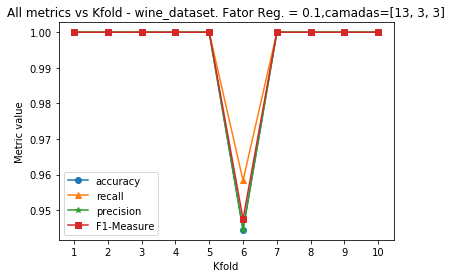

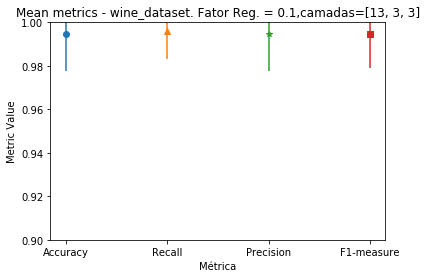

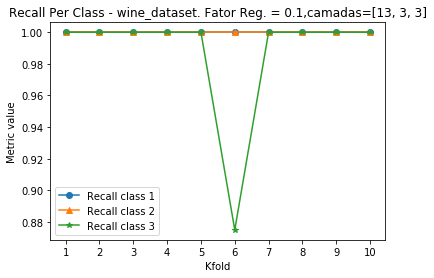

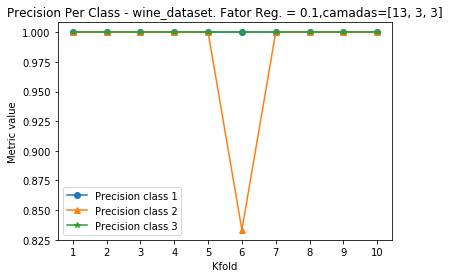

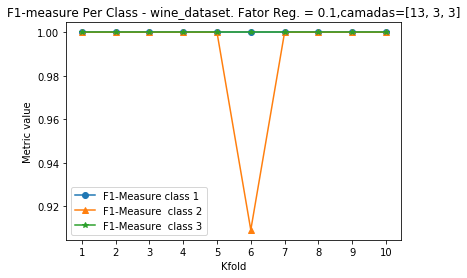

In [6]:
#wine dataset
#generate_table('datasets/wine_dataset_alpha_0.1_patience_400')
#generate_table('datasets/wine_dataset_alpha_0.15_patience_400')
#generate_table('datasets/wine_dataset_alpha_0.20_patience_400')
plot_graphs('datasets/wine_dataset_alpha_0.20_patience_400/wine_dataset_0.1_[13, 3, 3]-metrics.csv')

#ionosphere dataset
#generate_table('datasets/ionosphere_dataset_alpha_0.1_patience_600')
#plot_graphs('datasets/ionosphere_dataset_alpha_0.1_patience_600/ionosphere_dataset_0.05_[34, 3, 2]-metrics.csv')

#Pima dataset
#generate_table('datasets/pima_dataset_alpha_0.1_patience_800')
